<a href="https://colab.research.google.com/github/Tommmster/6620_/blob/master/CuraciondeDatos_entregable_parte_1y2_reversionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [139]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')


#!pip install matplotlib-venn
!pip install decouple

#from decouple import config
from sqlalchemy import create_engine, text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [141]:
# melb_data es un archivo que contiene las propiedades a aquilar con descripcion de las mismas , habitaciones, precio, vendedor , fecha 
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [142]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

# Ejercicio 1 SQL *Resolucion*


*1. Crear una base de datos en SQLite*

In [143]:
import pandas as pd
from sqlalchemy import create_engine, text

# crea una conexion a la base de datos BDCuracion
engine = create_engine('sqlite:///BDCuracion.db', echo=True)

2. *Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.*

In [144]:
melb_df.to_sql('melbourn', con=engine, if_exists="replace")

2022-06-08 02:22:42,876 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-08 02:22:42,880 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-08 02:22:42,884 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-08 02:22:42,888 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-08 02:22:42,892 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-08 02:22:42,894 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-08 02:22:42,898 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melbourn")
2022-06-08 02:22:42,900 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-08 02:22:42,907 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-08 02:22:42,909 INFO sqlalchemy.engine.Engine [raw sql] ('melbourn',)
2022-06-08 02:22:42,913 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melbo

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
#Aqui antes debemos subir el archivo generado en clase , el cual contiene los precios por codigos postal obtenido de la competencia de Kaggle
airbnb_df = pd.read_csv(
    '/content/airbnb_price_by_zipcode.csv')

FileNotFoundError: ignored

In [ ]:
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

3. *Implementar consultas en SQL que respondan con la siguiente información:
Cantidad de registros totales por ciudad. Cantidad de registros totales por barrio y ciudad.*

In [ ]:
query1 = 'SELECT COUNT(1) , CouncilArea FROM melbourn GROUP BY CouncilArea '
query2 = 'SELECT COUNT(1) ,  Suburb, CouncilArea FROM melbourn GROUP BY Suburb, CouncilArea '

queries = [query1, query2]

In [ ]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

4. *Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.*

In [ ]:
query3= 'SELECT Suburb, Address, Rooms, Type, Price, Method, SellerG,Date, Distance, Postcode, Bedroom2, Bathroom, Car,  Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude,  Longtitude, Regionname, Propertycount, zipcode, airbnb_price_mean, airbnb_record_count, airbnb_weekly_price_mean, airbnb_monthly_price_mean FROM melbourn  LEFT JOIN airbnb on melbourn.Postcode=airbnb.zipcode'

with engine.connect() as con:
      rs = con.execute(query3)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')


# Ejercicio 2 Resolución

 1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 


## Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import plotly.express as px
import numpy
import pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

Nos debemos centrar en la tarea de estimar el precio de cada propiedad, para ellos debemos conocer las caracteristicas de las mismas y el primer paso a realizar es una exploración de los datos y las distribuciones de sus variables, concocer si estas variables tienen nulos o valor cero, si esto es esperable o no, a los fines de conocer si son validas o no para ser elegidas para mi data set. Se aclara lo siguiente:

|melb_df | Contiene los datos de Melbourn melb_data.csv|
|--------|---------------------------------|
|airbnb_df | Contiene los datos de Airbnb |


In [150]:
#seteamos visualizacion 
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [149]:
#melb_df.describe() solo muestra variables numéricas
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Valores faltantes
Las siguientes variables tienen datos faltantes:


*   *YearBuilt*
*   *BuildingArea*
*   *CouncilArea*
*   *Car*



In [ ]:
plt.figure(figsize=(25,25))
seaborn.displot(
    data=melb_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette = "colorblind",
    multiple="fill",
    aspect=1.25
)

### Valores cero
Vemos  valores 0 en las columnas
*  *Bedrooms2* 
*  *Bathroom* 
*  *Car* 
*  *Landsize* 
*  *BuildingArea*


In [153]:
min_values = melb_df.describe().loc['min']
min_values.sort_values()

Lattitude         -38.18
Distance            0.00
Bedroom2            0.00
Bathroom            0.00
Car                 0.00
Landsize            0.00
BuildingArea        0.00
Rooms               1.00
Longtitude        144.43
Propertycount     249.00
YearBuilt        1196.00
Postcode         3000.00
Price           85000.00
Name: min, dtype: float64

Estos puede haber sido por causado por una mala recoleccion de datos, o falta de datos.  Recordemos que tenemos 13580 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.*

*Parece que hay variables con valores faltantes, que han sido reconocidos por pandas como NaN, y valores 0 que podrían ser tambien datos faltantes.*


*En esta muestra vemos las variables Landsize, BuildingArea, YearBuilt. con problemas potenciales*

*Landsize tiene valores 0.*

*BuildingArea y YearBuilt tienen NaN*

In [154]:
cols = melb_df[melb_df == 0].count(axis=0)
ds = cols[cols > 0]
ds

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64



---
### Selección de variables


Vamos a trabajar con las variables **Rooms**, **Bathroom**, **Car**, **Type**, **Regionname**, **BuildingArea**, **Method**, **Landsize**, relacionada con la variable a predecir: **Price**. 


Para comenzar analizamos aquellas variables que describen la propiedad por si misma, de acuerdo a sus caracteristicas y considerando algunos aspectos esperados. Por ejemplo si el tipo de casa es `h` (*house*) se espera que tenga por lo menos 1 baño (*bathroom*), dormitorio (*bedroom2*) o 1 ambiente(*rooms*).

In [155]:
interesting_variables = ['Rooms', 'Car', 'Type', 'Regionname', 'BuildingArea', 'Method', 'Landsize']

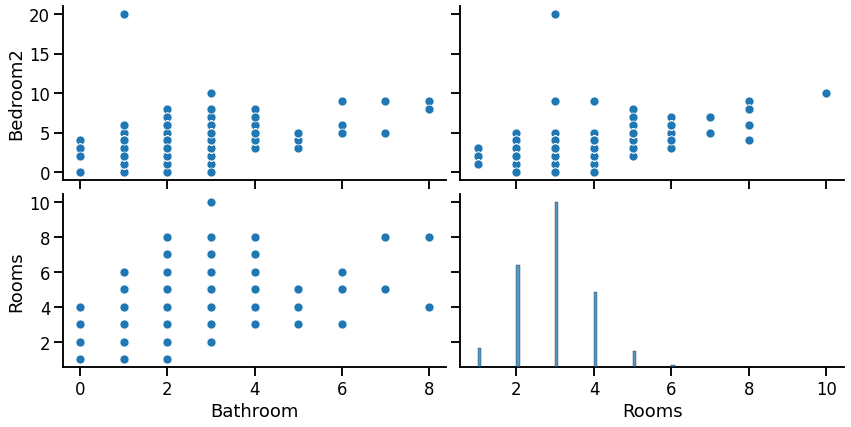

In [156]:
seaborn.pairplot(data=melb_df,
                 y_vars=['Bedroom2', 'Rooms'],
                 x_vars=['Bathroom', 'Rooms'],
                 aspect=2, height=3)

Se puede observar un caso con 20 habitaciones (**Bedroom**), 1 baño (**Bathroom**) y 3 habitaciones (**Room**), lo cual es poco probable que sea asi, este caso nos estaria generando ruido.

Para la variable **Bedroom2**  vemos que existe una única ocurrencia para los valores **10** y **20**

In [157]:
melb_df.Bedroom2.value_counts()

3.00     5896
2.00     3737
4.00     2601
1.00      691
5.00      556
6.00       63
0.00       16
7.00       10
8.00        5
9.00        3
20.00       1
10.00       1
Name: Bedroom2, dtype: int64

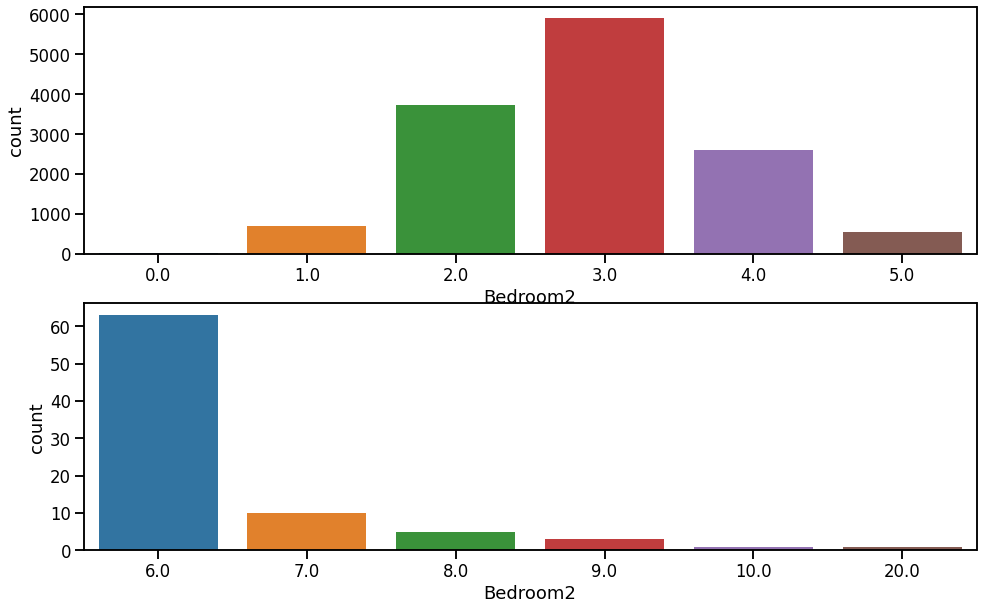

In [159]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
seaborn.countplot(data = melb_df[melb_df['Bedroom2'] <= 5.0], x = 'Bedroom2', ax = axes[0])

seaborn.countplot(data = melb_df[melb_df['Bedroom2'] > 5.0], x = 'Bedroom2', ax = axes[1])

Considerando que la mediana de la variable **Bathroom** para aquellas propiedades que cumplen con `Bedroom2 == 2` tiene un valor de `1`, y que la media de `1.15`, podemos suponer que el valor de `20` es un error de carga, siendo que en realidad el valor es `2`

In [160]:
melb_df[melb_df.Bedroom2 == 20]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7404,Caulfield East,5 Grange Rd,3,h,1650000.00,PI,Woodards,6/08/2016,9.30,3145.00,...,1.00,2.00,875.00,NaN,NaN,Glen Eira,-37.88,145.05,Southern Metropolitan,608.00


In [161]:
melb_df[melb_df.Bedroom2 == 2].Bathroom.describe()

count   3737.00
mean       1.15
std        0.38
min        0.00
25%        1.00
50%        1.00
75%        1.00
max        3.00
Name: Bathroom, dtype: float64

Por otro lado, la variable **Landsize** se encuentra alejada de la media y la mediana de aquellas propiedades que cumplen con `Bedroom2 == 2`. Particularmente también se encuentra por encima del 75% de los datos.

In [162]:
melb_df[melb_df.Bedroom2 == 2].Landsize.describe()

count    3737.00
mean      419.87
std      1450.74
min         0.00
25%         0.00
50%       158.00
75%       373.00
max     37000.00
Name: Landsize, dtype: float64

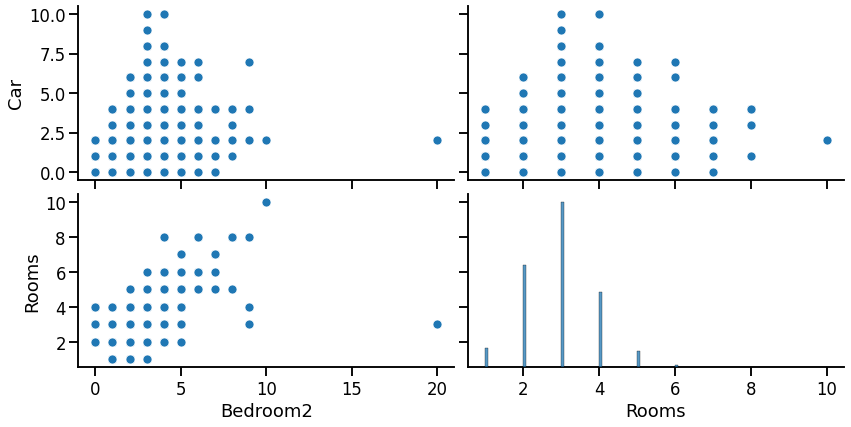

In [163]:
#airbnb_df --> contien informacion del archivo airbnb_price_by_zipcode  
#df_melbourn --> contiene informacion de melbourn
seaborn.pairplot(data=melb_df,
                 y_vars=['Car', 'Rooms'],
                 x_vars=['Bedroom2', 'Rooms'],
                 aspect=2, height=3)


Se puede observar que para **Bedroom2** tiene un caso con valor 20 con 2 cocheras y 3 rooms lo cual no es algo razonable, considerando que dicho dato fue obtenido a traves de otra fuente de datos, lo cual puede tener algun tipo de sesgo, por este motivo se dejara de lado esta variable del estudio de prediccion del precio.





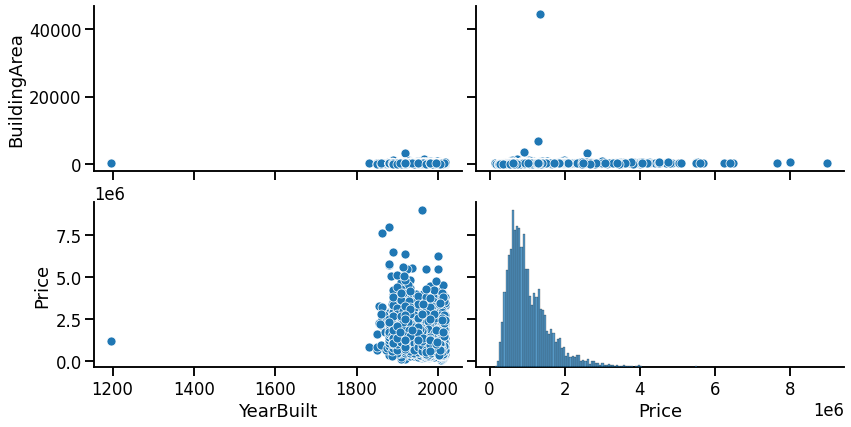

In [164]:

seaborn.pairplot(data=melb_df,
                 y_vars=['BuildingArea', 'Price'],
                 x_vars=['YearBuilt', 'Price'],
                 aspect=2, height=3)

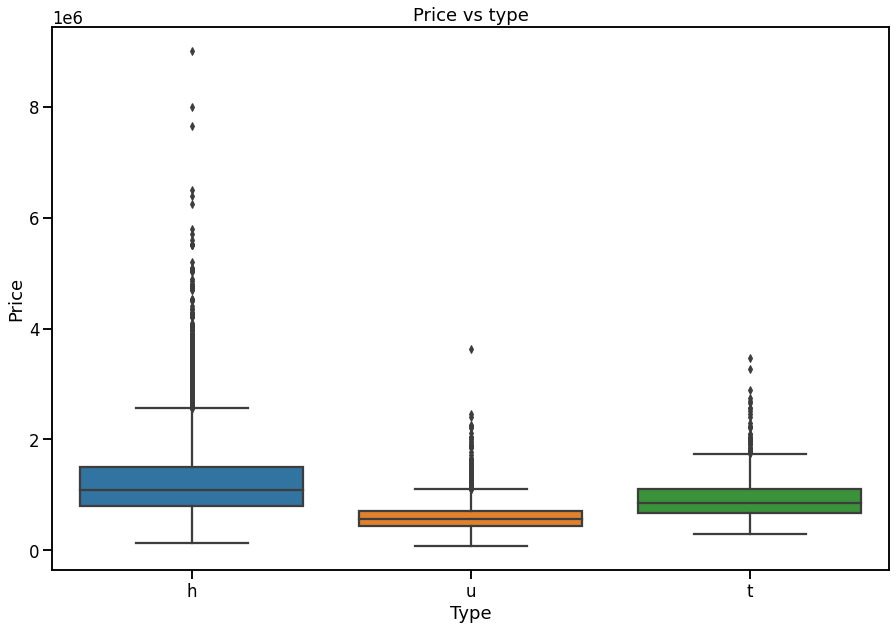

In [165]:
plt.figure(figsize=(15,10))
plt.title('Price vs type')
seaborn.boxplot(x="Type", y="Price",  data=melb_df)

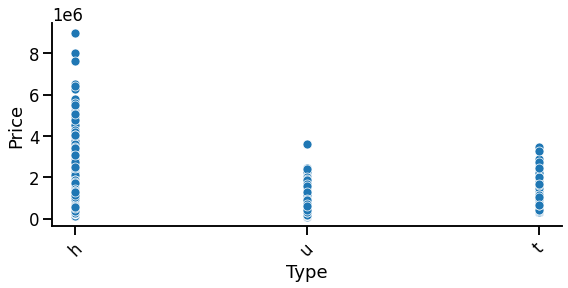

In [166]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Type'],
                 aspect=2, height=4)
plt.xticks(rotation=45);

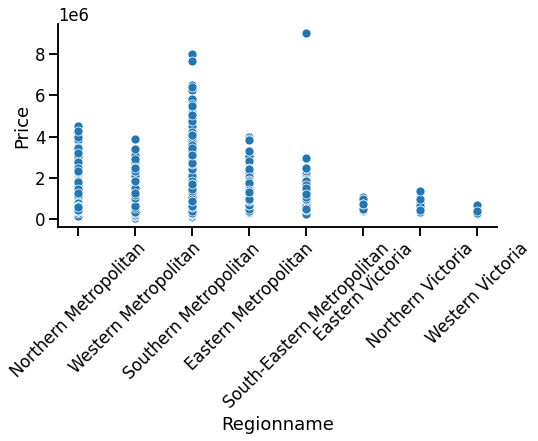

In [167]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Regionname'],
                 aspect=2, height=4)
plt.xticks(rotation=45);

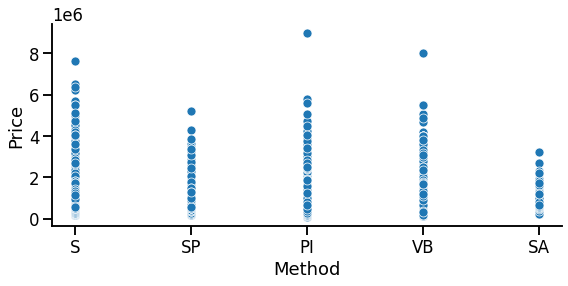

In [168]:
seaborn.pairplot(data=melb_df, y_vars=['Price'],
                 x_vars=['Method'],
                 aspect=2, height=4)


De las columnas analizadas podemos concluir lo siguiente:
* Se considera que aquellas variables que informan sobre las caracteristicas 
del inmueble: **Bedroom2**, **car**, **Rooms**, **Bathrooms** son relevantes para el analisis de prediccion del Precio, dado que segun las graficas observadas puede apreciarse su distribucion es bastante razonable.
* Con respecto a las variables: **Method** , **Type**, **Regionname**,también según las gráficas realizadas, se observa que son relevantes para el analisis de predicción por lo que se las incluirá en el dataset.

* Por otro lado se observan valores no razonables de la variable **Bedroom2** la cual será eliminada del set de datos.


In [169]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [170]:
# se eliminara la columna Bedroom2 , previamente se efectuara una copia del dataframe.

melb_df_bkp = melb_df.copy(deep=True)

melb_df=melb_df.drop('Bedroom2',axis=1)

melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

---
## Ejercicio 2, parte 2 


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

1. *Analizamos las variables dadas en el archivo de AirBnB consideramos las mas relavantes:*

In [171]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude','property_type', 'bathrooms', 'bedrooms'
]



In [172]:
df_airbnb_adic = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [173]:
len(df_airbnb_adic)

22895

In [174]:
df_airbnb_adic.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

 Sin embargo, la columna **zipcode** tiene tipos diferentes. Debemos estandarizarlo antes de continuar con la combinación de los dato

In [175]:
df_airbnb_adic['zipcode'] = pandas.to_numeric(df_airbnb_adic.zipcode, errors='coerce')

In [176]:
df_airbnb_adic.zipcode.value_counts()

3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

de esta forma unificamos el formato del campo zipcode. Y
Necesitamos establecer una relación entre conjuntos de datos `df_melbourne` y `df_airbnb_adic` a través de este campo, pero primero debemos verificar que los codigos postales correspondan a la misma zona. Para ello primero realizaremos la intersección y realizamos un análisis al respecto:

In [177]:
# buscamos la intersecion de los 248 valores de AIRBNB 191 tambien estan en melb 
intersection = numpy.intersect1d(
    df_airbnb_adic.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(df_airbnb_adic.zipcode.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


Como se puede apreciar hay **248** valores de **zipcode** distintos en el conjunto de datos de *Airbnb* y **198** en el de **Melbourne**. A su vez hay **191** valores en común en ambos conjuntos de datos.

In [178]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      df_airbnb_adic.zipcode.isin(intersection).sum() / len(df_airbnb_adic))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Se puede observar que hay un 99%  estan en la interseccion , no asi de los que estan en el dataframe de Airbnb. 

### Filtrado de zipcodes

Eliminamos los valores de zipcode con tres o menos ocurrencias

In [179]:
threshold = 3
zipcode_counts = df_airbnb_adic.zipcode.value_counts()
size_filter = zipcode_counts > threshold
print(len(zipcode_counts[size_filter]))
print(len(zipcode_counts[~size_filter]))

selected_zipcodes = zipcode_counts[size_filter]

218
29


In [183]:
selected_zipcodes = zipcode_counts[size_filter].index.array
df_airbnb_adic = df_airbnb_adic[df_airbnb_adic.zipcode.isin(selected_zipcodes)]
df_airbnb_adic.sample(5)

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,property_type,bathrooms,bedrooms,price,weekly_price,monthly_price
19159,An ENTIRE apartment ALL TO YOURSELF (and frien...,Melbourne City - voted one of the most liveabl...,"Melbourne, VIC, Australia",Central Business District,Melbourne,Melbourne,VIC,3000.00,-37.82,144.95,Apartment,1.00,2.00,119,NaN,NaN
212,I have a sofabed in my house in Yarraville. F...,NaN,"Yarraville, VIC, Australia",Yarraville/Seddon,Maribyrnong,Yarraville,VIC,3013.00,-37.82,144.89,House,1.00,1.00,100,NaN,NaN
16062,"The “Empire Melbourne,” a boutique tower risin...",Restaurants available nearby - Nene Chicken El...,"Melbourne, VIC, Australia",Central Business District,Melbourne,Melbourne,VIC,3004.00,-37.81,144.96,Apartment,1.00,1.00,145,NaN,NaN
11949,My little studio is close to the city and righ...,Listed below are my picks of the area! Great c...,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.00,-37.81,144.97,Apartment,1.00,1.00,100,NaN,NaN
18626,A new apartment at the centre of Bentleigh eas...,NaN,"Bentleigh East, VIC, Australia",Bentleigh,Glen Eira,Bentleigh East,VIC,3165.00,-37.92,145.06,Apartment,1.00,1.00,69,NaN,NaN


Observamos que podemos agregar como datos: el promedio de precio semanal (*weekly_price*), promedio de precio mensual (*monthly_price*).

In [184]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

In [185]:

df_airbnb_adic[relevant_cols + ['zipcode']].groupby('zipcode').mean().reset_index()[:5]

,zipcode,price,weekly_price,monthly_price
0,3000.00,150.50,918.74,3407.20
1,3002.00,200.98,956.38,3712.71
2,3003.00,130.21,760.20,2629.50
3,3004.00,158.27,1061.17,3759.93
4,3006.00,188.85,1239.83,4358.56


In [189]:
# Agregamos algunas columnas relevantes 
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode', 'street', 'neighborhood', 'city','suburb']#, 'state', 'latitute', 'longitude']

airbnb_price_by_zipcode = df_airbnb_adic[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean', 'street': 'count', 'neighborhood': 'count', 'city': 'count','suburb': 'count'})\
  .reset_index()

In [190]:
airbnb_price_by_zipcode

zipcode  price       weekly_price monthly_price street neighborhood  city  \
              mean count         mean          mean  count        count count   
0   3000.00 150.50  3367       918.74       3407.20   3367         3259  3367   
1   3002.00 200.98   197       956.38       3712.71    197          188   197   
2   3003.00 130.21   267       760.20       2629.50    267          260   267   
3   3004.00 158.27   728      1061.17       3759.93    728          705   728   
4   3006.00 188.85  1268      1239.83       4358.56   1268         1241  1268   
..      ...    ...   ...          ...           ...    ...          ...   ...   
213 3911.00 334.60    10      1340.00       6350.00     10            0    10   
214 3975.00  99.50     6       850.00       3000.00      6            0     6   
215 3977.00  92.96    45       422.00       1025.00     45            0    45   
216 3978.00 177.00     7       950.67       7770.00      7            0     7   
217 3980.00  86.40     5          NaN           NaN      5            0     5   

    suburb  
     count  
0     3366  
1      197  
2      267  
3      728  
4     1268  
..     ...  
213     10  
214      6  
215     45  
216      7  
217      5  

[218 rows x 9 columns]

In [191]:
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)
airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,street count,neighborhood count,city count,suburb count
0,3000.00,150.50,3367,918.74,3407.20,3367,3259,3367,3366
1,3002.00,200.98,197,956.38,3712.71,197,188,197,197
2,3003.00,130.21,267,760.20,2629.50,267,260,267,267


In [192]:
# ahora hacemos la interseccion en pandas

merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode')


In [193]:
merged_sales_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,street count,neighborhood count,city count,suburb count
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,4019.00,3067.00,130.62,258.00,605.15,2187.03,258.00,246.00,258.00,258.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,4019.00,3067.00,130.62,258.00,605.15,2187.03,258.00,246.00,258.00,258.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,4019.00,3067.00,130.62,258.00,605.15,2187.03,258.00,246.00,258.00,258.00


### Punto 3 Otras columnas

Para seleccionar columnas candidatas que sirvan para combinar ambos conjuntos de datos podemos plantear los siguientes criterios

* Agrupar por variables estructurales. Por ejemplo, cantidad de habitaciones o baños
* Agrupar por ubicación dentro del área urbana, como ser suburbio o barrio

* Agregar por espacio para estacionar. Si bien no existe explícitamente en el conjunto de datos de airbnb, si se puede derivar a partir de la columna `amenities`
* Por areas poligonales definidas en un catálogo. A partir de los valores de latitud y longitud (disponibles en ambos conjuntos de datos) se puede evaluar la pertenencia de la propiedad dentro de un area arbitraria.





Finalmente tomamos las columas que indican
* Cantidad de baños (`Bathroom` / `bathrooms`)
* Ubicación de la propiedad (`Suburb` / `street`)

La justificación se basa en que se analizan dimensiones distintas de cada propiedad, y que existe una correlación entre la cantidad de baños y otros parametros de una casa o departamento.



---



In [194]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')

airbnb_df.columns

#### Por ubicación

Se puede hacer una correspondencia entre los valores la columna `Suburb` del conjunto de datos `melb_df` y un subconjunto de los presentes en la columna `street` del conjunto de datos `airbnb_df`

In [ ]:
melb_df.Suburb.value_counts()

In [ ]:
airbnb_df[airbnb_df.street.str.contains('Melbourne')].street.value_counts()

#### Columna candidata: Tipo de propiedad

Ambos conjuntos de datos tienen una columna que indica el tipo de propiedad. Esta columna ces 

In [239]:
airbnb_df.property_type.value_counts()

Apartment                 12469
House                      5967
Townhouse                  1434
Condominium                 544
Serviced apartment          500
Villa                       326
Guesthouse                  276
Bed and breakfast           263
Guest suite                 260
Loft                        191
Cottage                     157
Bungalow                    157
Other                        49
Cabin                        46
Boutique hotel               44
Farm stay                    43
Hostel                       32
Tiny house                   25
Camper/RV                    16
Aparthotel                   12
Hotel                        11
Campsite                     10
Earth house                  10
Tent                          9
Nature lodge                  8
Boat                          8
Resort                        6
Barn                          5
Chalet                        4
Castle                        4
Hut                           3
Treehous

In [238]:
melb_df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

#### Columna candidata : Baños

In [240]:
airbnb_df.bathrooms.value_counts()

1.00     16568
2.00      3681
1.50      1290
2.50       657
3.00       324
3.50       110
0.50        81
4.00        70
5.00        34
0.00        31
4.50        11
6.00         6
5.50         6
7.00         2
6.50         2
8.00         1
14.00        1
9.00         1
7.50         1
10.00        1
Name: bathrooms, dtype: int64

In [241]:
melb_df.Bathroom.value_counts()

1.00    7512
2.00    4974
3.00     917
4.00     106
0.00      34
5.00      28
6.00       5
7.00       2
8.00       2
Name: Bathroom, dtype: int64

Si bien las distribuciones no son exactamente iguales (y deben curarse los casos donde figuran fracciones de baños), esta columna es una buena candidata ya que ambas variables presentan una distribución similar

In [284]:
melb_df.Bathroom.describe()

count   13580.00
mean        1.53
std         0.69
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         8.00
Name: Bathroom, dtype: float64

In [285]:
airbnb_df.bathrooms.describe()

count   22878.00
mean        1.29
std         0.58
min         0.00
25%         1.00
50%         1.00
75%         1.50
max        14.00
Name: bathrooms, dtype: float64

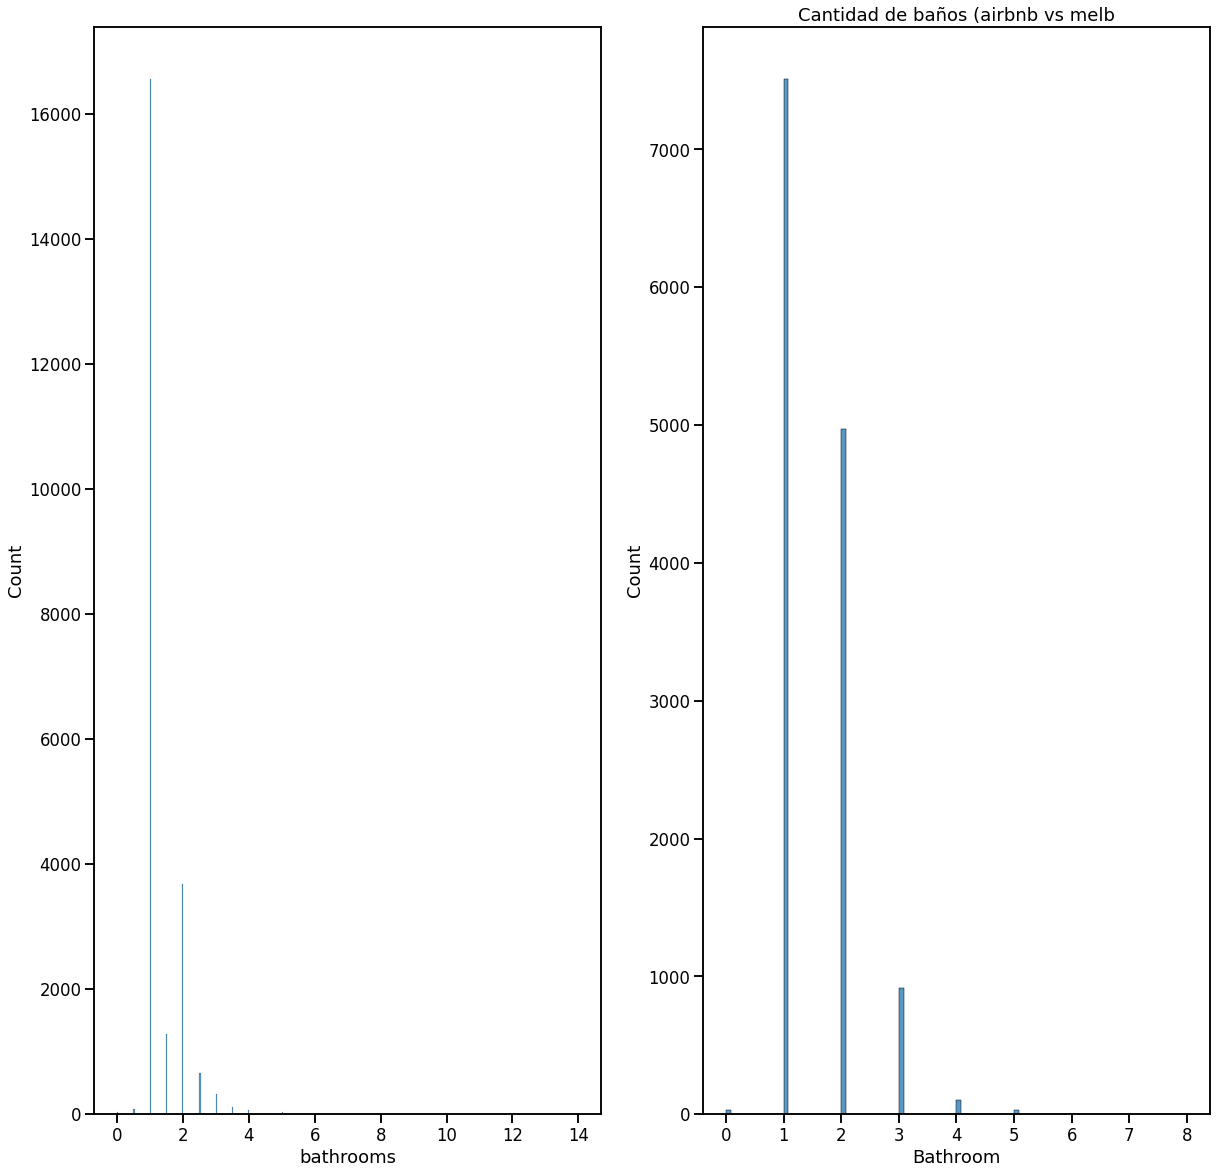

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
plt.title('Cantidad de baños (airbnb vs melb)')

seaborn.histplot(data = airbnb_df, x='bathrooms', ax=ax1)
seaborn.histplot(data = melb_df, x='Bathroom', ax=ax2)

#### Columna candidata: Espacio para estacionar

Mas de `2/3` de las propiedades en el conjunto de datos de airbnb contienen espacio para estacionar

In [286]:
def naive_parking_detector(s):
  """
  Naive check to validate if an airbnb property includes parking space.
  It assumes that the word 'parking' is not preceded or followed by a negative
  modifier, such as 'no parking' or 'parking forbidden'. 
  Also, performance is not considered as a factor.
  """
  r = s.replace("{", "").replace("}", "")\
  .replace('"','').lower()

  return 'parking' in r.lower()

airbnb_df['car'] = airbnb_df.amenities.apply(naive_parking_detector)
airbnb_df.car.value_counts()

True     16815
False     6080
Name: car, dtype: int64

En el conjunto de datos de Melbourne, la proporción es aún mas alta.

In [287]:
print(len(melb_df))
len(melb_df[melb_df.Car > 0])

13580


12492